# Short-time Fourier transform

Let $x(t) \in \mathbb{R}$ be a signal defined in the time domain $t \in \mathbb{Z}$ with support (i.e. where it is non-zero) $\{0,...,T-1\}$. 

The **spectrogram** is a 3D representation highlighting the characteristics of the signal along three dimensions: time, frequency, and mangnitude. It is defined as the modulus of the **short-time Fourier transform** (STFT).

## Definition 

The STFT is defined as the discrete Fourier transform (DFT) of short overlapping frames of the signal. 

Formally, it is defined by:

$$ X(f,n) = \sum_{t \in \mathbb{Z}} x_n(t) \exp\left(-j2\pi \frac{ft}{F}\right), \qquad \forall (f,n) \in \{0,...,F-1\} \times \mathbb{Z}, \qquad (1)$$

where the frame $x_n(t)$ corresponds to the original signal shifted in time and multiplied by a short smooth analysis window:

$$ x_n(t) =  x(t + nH) w(t), \qquad (2)$$

and

- $w(t)$ is the short smooth analysis window of support $\{0,...,L-1\}$;
- $H$ is the analysis hop size (assuming $L/H \in \mathbb{N}$), i.e. it defines the number of samples by which we shift the signal at each time frame;
- $F$ is the order of the discrete Fourier transform (we will choose $F=L$).

The inverse STFT is defined by the overlap-add procedure:

$$ \hat{x}(t) = \sum_{n \in \mathbb{Z} } w(t-nH) \hat{x}_n(t-nH), \qquad \forall t \in \mathbb{Z}, \qquad (3)$$ 

where $\hat{x}_n(t)$ is the inverse DFT of the spectrum at time index $n$:

$$ \hat{x}_n(t) = \frac{1}{F}\sum_{f=0}^{F-1} X(f,n) \exp\left(+ j2\pi \frac{ft}{F}\right). \qquad (4) $$

## Properties

### Hermitian symmetry

As a consequence of using the DFT, the STFT is Hermitian symmetric: 

$$X(F-f,n) = X^*(f,n).$$
  
Therefore, we usually discard the spectrum above Nyquist frequency $F/2$, as it can be reconstructed from the spectrum below this limit. 

### Perfect reconstruction

We can show that perfect reconstruction (i.e. $\hat{x}(t) = x(t)$) is ensured provided that the window $w(t)$ satisfies:

  $$ \sum_{n \in \mathbb{Z} } w^2(t-nH) = 1. \qquad (5)$$

## Spectrogram

For a real-valued signal, the STFT is generally complex valued. Its modulus $|X(f,n)|$ is called the **magnitude spectrogram**, its squared modulus $|X(f,n)|^2$ the **power spectrogram**, and its argument $\arg(X(f,n))$ the **phase spectrogram**.

## Example

Let's now play with the STFT on the following piano signal, using the [librosa](https://librosa.github.io/librosa/) library.

<audio src="./data/FMP_C8_Audio_C-major-scale.mp3" type="audio/mpeg" controls="controls"></audio>

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa, librosa.display
import IPython.display as ipd
%matplotlib inline

/data/miniconda3/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Text(0.5, 1.0, 'waveform')

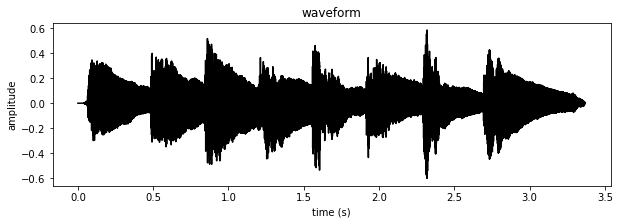

In [2]:
# load and plot the waveform

fs = 22050
wavefile = os.path.join('data', 'FMP_C8_Audio_C-major-scale.mp3')
x, fs = librosa.load(wavefile, sr=fs)
time = np.arange(0,x.shape[0]/fs, 1/fs)
plt.figure(figsize=(10,3))
plt.plot(time, x, 'k')
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.title('waveform')

(0.0, 4000.0)

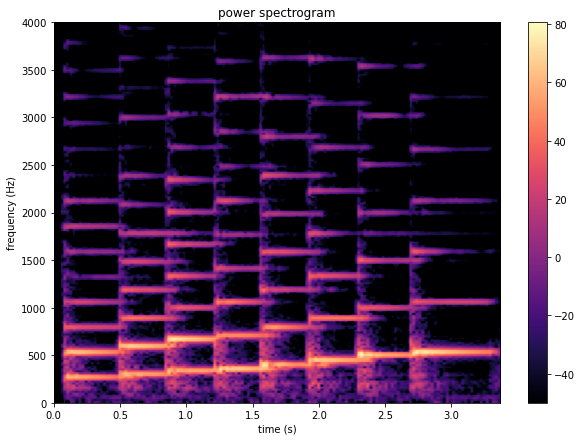

In [3]:
# Compute the STFT and the power spectrogram

win_length = 1024 # length of the analysis window in samples
hop_length = 512 # number of samples between to analysis windows

X = librosa.stft(x, n_fft=win_length, hop_length=hop_length, win_length=win_length, 
                 window='hann', center=True, pad_mode='constant')

F,N = X.shape

V = np.abs(X)**2 # power spectrogram

V_dB = 10*np.log10(np.abs(V)**2) # power spectrogram in dB

plt.figure(figsize=(10,7))
plt.imshow(V_dB, origin='lower',  aspect='auto', cmap='magma', extent=[0, (N-1)*hop_length/fs, 0, fs/2])

plt.clim(vmin=-50, vmax=None)
plt.colorbar()   
plt.xlabel('time (s)')
plt.ylabel('frequency (Hz)')
plt.title('power spectrogram')
plt.ylim([0,4000])

Text(0.5, 1.0, 'reconstruction error')

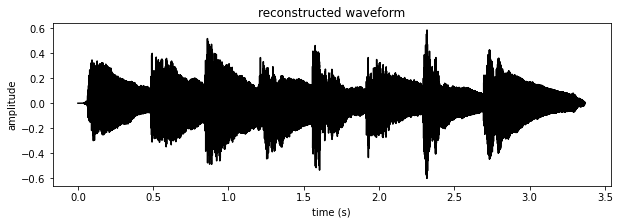

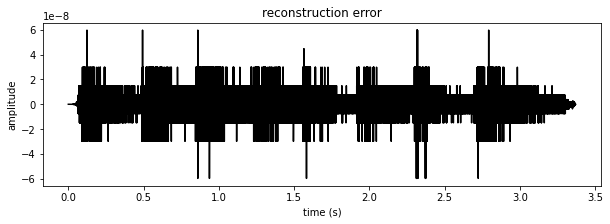

In [4]:
# Compute the inverse STFT

x_hat = librosa.istft(X, hop_length=hop_length, win_length=win_length, 
                 window='hann', center=True, length=x.shape[0])

plt.figure(figsize=(10,3))
plt.plot(time, x_hat, 'k')
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.title('reconstructed waveform')

plt.figure(figsize=(10,3))
plt.plot(time, x-x_hat, 'k')
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.title('reconstruction error')
